# Campionamento di Funzione D'Onda Quantistica con l'Algoritmo di Metropolis

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

| Wavefunction | Uniform dr | Gaussian dr|
| :---          |:----:|:---: |
| Ground State  | 1.0  | 0.8  |
| Excited State | 2.5  | 1.7 |

### Stato Fondamentale (Matrice di Transizione Uniforme)

$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$

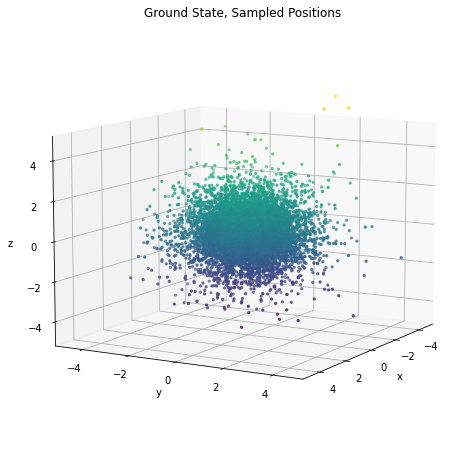

In [4]:
datafile = "./data/gs/uniform/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack='true')

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
N = 10000
ax.scatter(X[0:N], Y[0:N], Z[0:N], c=Z[0:N], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
lim = 5
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim, lim)
ax.set_zlim3d(-lim, lim)
ax.view_init(10, 30)

ax.title.set_text("Ground State, Sampled Positions")
plt.show()

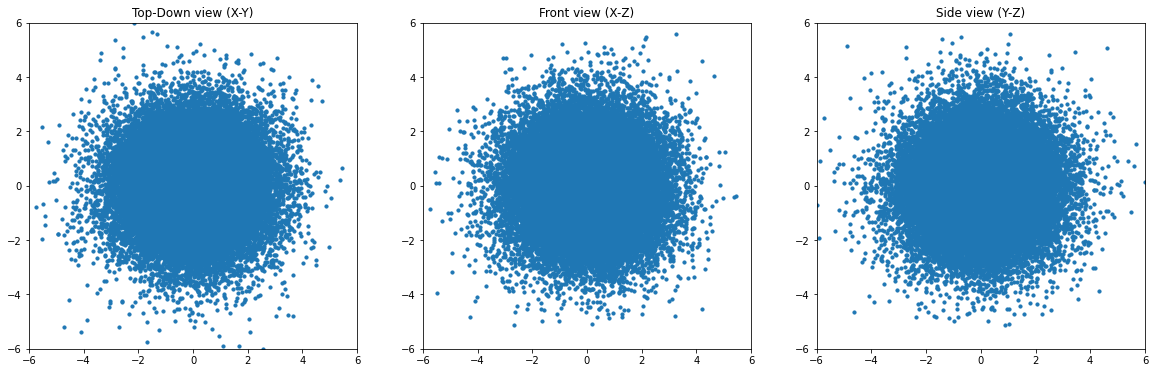

In [3]:
datafile = "./data/gs/uniform/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack='true')

fig, ax = plt.subplots(1,3, figsize=(20, 6))
ms = 10
lim = 6
ax[0].scatter(X,Y, ms)
ax[0].title.set_text("Top-Down view (X-Y)")
ax[0].set_xlim(-lim, lim)
ax[0].set_ylim(-lim, lim)

ax[1].scatter(X,Z, ms)
ax[1].title.set_text("Front view (X-Z)")
ax[1].set_xlim(-lim, lim)
ax[1].set_ylim(-lim, lim)

ax[2].scatter(Y,Z, ms)
ax[2].title.set_text("Side view (Y-Z)")
ax[2].set_xlim(-lim, lim)
ax[2].set_ylim(-lim, lim)

plt.show()

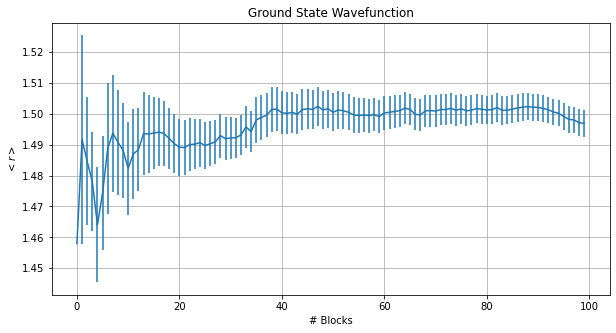

In [10]:
datafile = "./data/gs/uniform/average_position.dat"

avg, err = np.loadtxt(datafile, usecols=(1, 2), unpack=True)

N = 100
x = np.arange(N)
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, avg, yerr=err)
plt.xlabel('# Blocks')
plt.ylabel('$<r>$')
plt.title('Ground State Wavefunction')
plt.show()

### Stato Eccitato (Matrice di Transizione Uniforme)

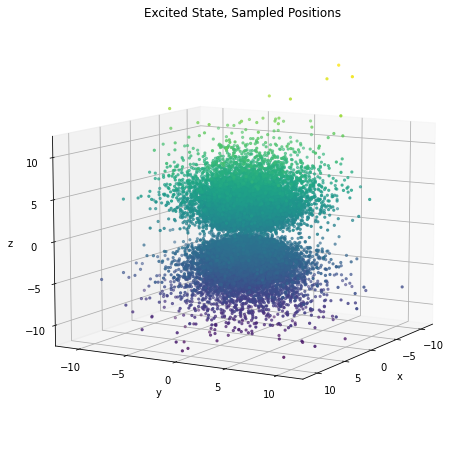

In [5]:
datafile = "./data/es/uniform/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack='true')

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
N = 20000
ax.scatter(X[0:N], Y[0:N], Z[0:N], c=Z[0:N], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
lim = 12
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim, lim)
ax.set_zlim3d(-lim, lim)
ax.view_init(10, 30)
ax.title.set_text("Excited State, Sampled Positions")
plt.show()

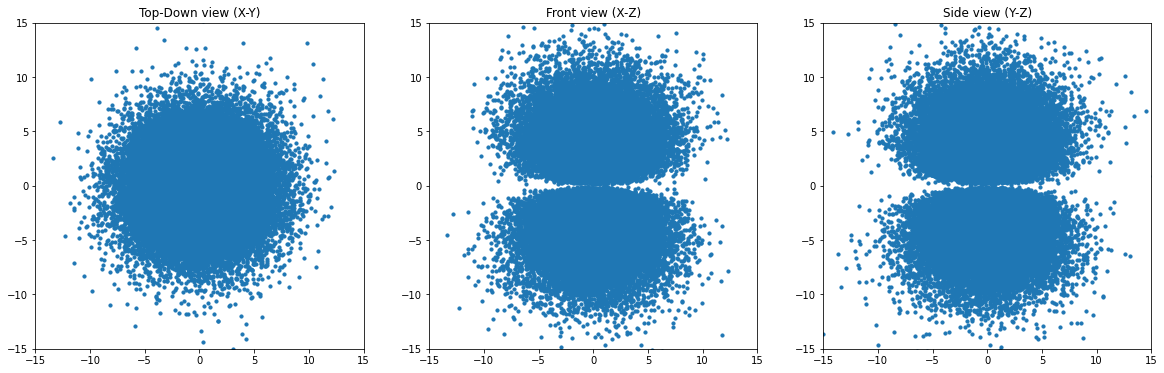

In [9]:
datafile = "./data/es/uniform/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack='true')

fig, ax = plt.subplots(1,3, figsize=(20, 6))
ms = 10
lim = 15
ax[0].scatter(X,Y, ms)
ax[0].title.set_text("Top-Down view (X-Y)")
ax[0].set_xlim(-lim, lim)
ax[0].set_ylim(-lim, lim)

ax[1].scatter(X,Z, ms)
ax[1].title.set_text("Front view (X-Z)")
ax[1].set_xlim(-lim, lim)
ax[1].set_ylim(-lim, lim)

ax[2].scatter(Y,Z, ms)
ax[2].title.set_text("Side view (Y-Z)")
ax[2].set_xlim(-lim, lim)
ax[2].set_ylim(-lim, lim)
plt.show()

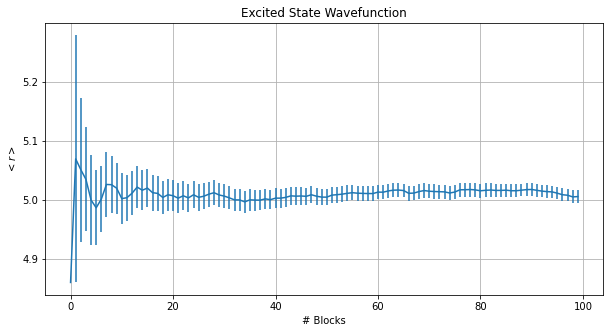

In [10]:
datafile = "./data/es/uniform/average_position.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=' ', unpack='true')

N = 100       
x = np.arange(N)
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, avg, yerr=err)
plt.xlabel('# Blocks')
plt.ylabel('$<r>$')
plt.title('Excited State Wavefunction')
plt.show()

### Stato Fondamentale (Matrice di Transizione Gaussiana)



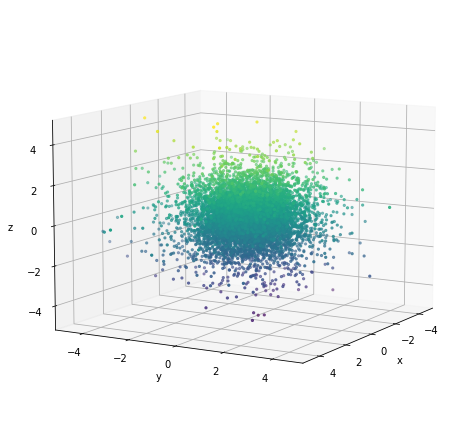

In [11]:
datafile = "./data/gs/gaussian/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack='true')

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
N = 10000
ax.scatter(X[0:N], Y[0:N], Z[0:N], c=Z[0:N], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
lim = 5
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim, lim)
ax.set_zlim3d(-lim, lim)
ax.view_init(10, 30)
plt.show()

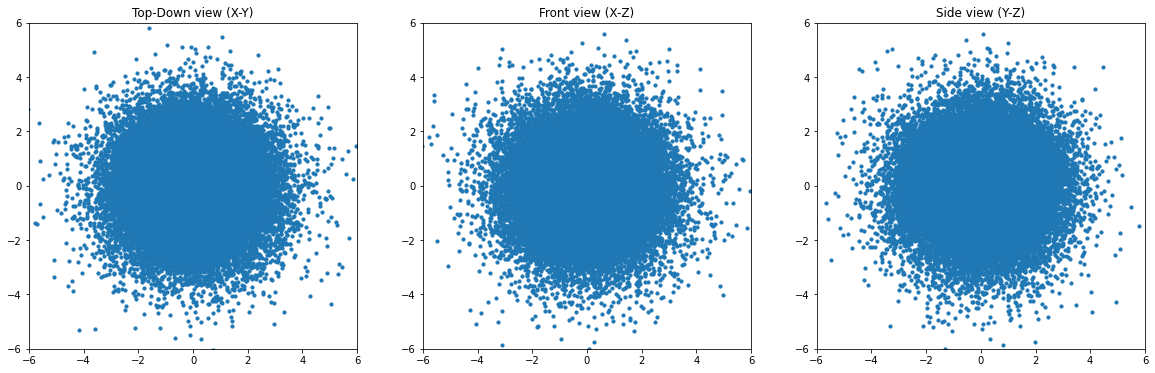

In [12]:
datafile = "./data/gs/gaussian/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack='true')

fig, ax = plt.subplots(1,3, figsize=(20, 6))
ms = 10
lim = 6
ax[0].scatter(X,Y, ms)
ax[0].title.set_text("Top-Down view (X-Y)")
ax[0].set_xlim(-lim, lim)
ax[0].set_ylim(-lim, lim)

ax[1].scatter(X,Z, ms)
ax[1].title.set_text("Front view (X-Z)")
ax[1].set_xlim(-lim, lim)
ax[1].set_ylim(-lim, lim)

ax[2].scatter(Y,Z, ms)
ax[2].title.set_text("Side view (Y-Z)")
ax[2].set_xlim(-lim, lim)
ax[2].set_ylim(-lim, lim)

plt.show()

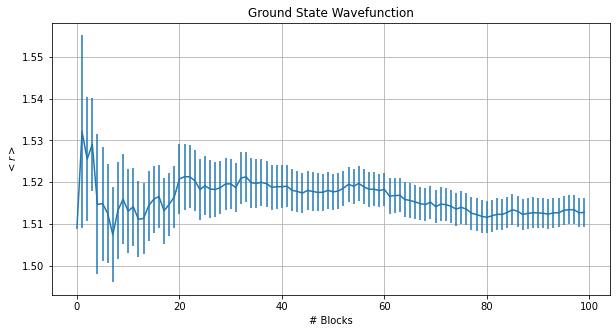

In [13]:
datafile = "./data/gs/gaussian/average_position.dat"

avg, err = np.loadtxt(datafile, usecols=(1, 2), unpack=True)

N = 100
x = np.arange(N)
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, avg, yerr=err)
plt.xlabel('# Blocks')
plt.ylabel('$<r>$')
plt.title('Ground State Wavefunction')
plt.show()

### Stato Eccitato (Matrice di Transizione Gaussiana)

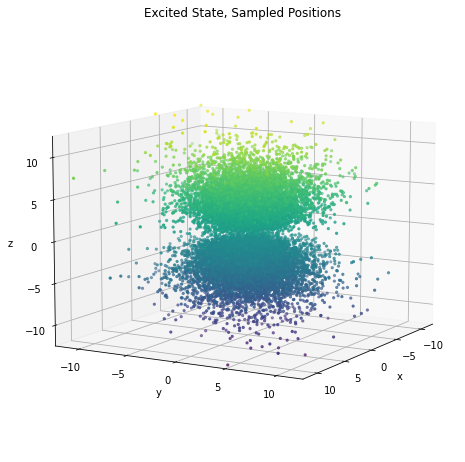

In [19]:
datafile = "./data/es/gaussian/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack='true')

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
N = 20000
ax.scatter(X[0:N], Y[0:N], Z[0:N], c=Z[0:N], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
lim = 12
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim, lim)
ax.set_zlim3d(-lim, lim)
ax.view_init(10, 30)
ax.title.set_text("Excited State, Sampled Positions")
plt.show()

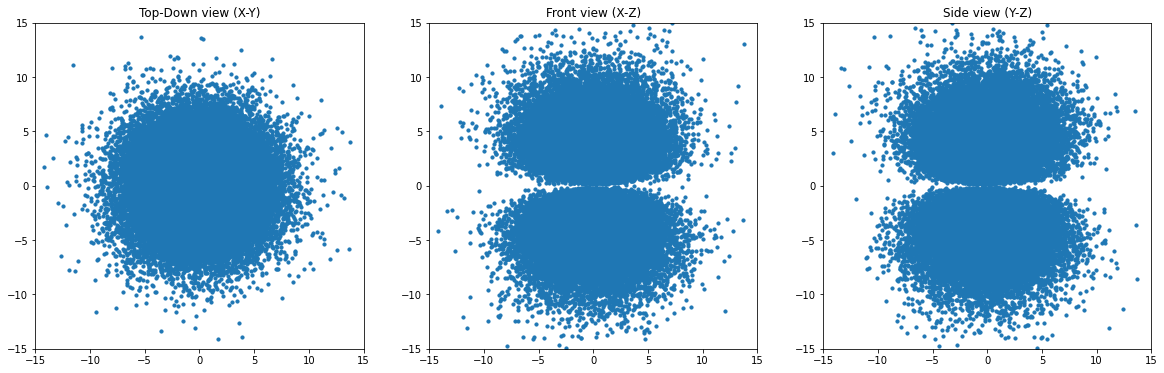

In [17]:
datafile = "./data/es/gaussian/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack='true')

fig, ax = plt.subplots(1,3, figsize=(20, 6))
ms = 10
lim = 15
ax[0].scatter(X,Y, ms)
ax[0].title.set_text("Top-Down view (X-Y)")
ax[0].set_xlim(-lim, lim)
ax[0].set_ylim(-lim, lim)

ax[1].scatter(X,Z, ms)
ax[1].title.set_text("Front view (X-Z)")
ax[1].set_xlim(-lim, lim)
ax[1].set_ylim(-lim, lim)

ax[2].scatter(Y,Z, ms)
ax[2].title.set_text("Side view (Y-Z)")
ax[2].set_xlim(-lim, lim)
ax[2].set_ylim(-lim, lim)
plt.show()

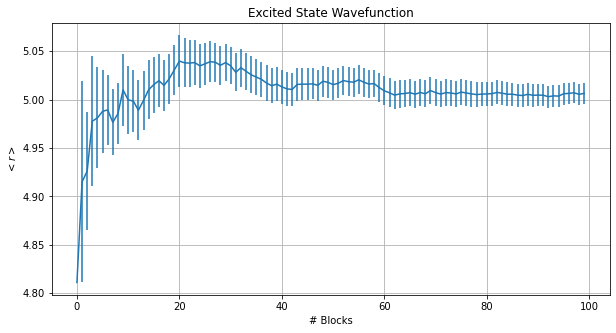

In [18]:
datafile = "./data/es/gaussian/average_position.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=' ', unpack='true')

N = 100       
x = np.arange(N)
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, avg, yerr=err)
plt.xlabel('# Blocks')
plt.ylabel('$<r>$')
plt.title('Excited State Wavefunction')
plt.show()